# **Working With Date & Time Series Data**
---
**The dataset on cryptocurrency (Ethereum) is used in this work. Originally, its size is 23674 records spread over 7 columns (or attributes) i.e. 165718 data points. Later on, more columns are added and the date column is streamlined, all for more granular and easier analysis.**


In [ ]:
# Importing the data file

import pandas as pd

df = pd.read_csv('/content/DateTimeData.csv')  # File contains data on Ethereum (cryptocurrency)
# pd.set_option('display.max_columns', df.shape[1])  # If file has 20+ cols, all cols will be visible

In [160]:
df.head(3) # Glancing at data's top 3 rows

,ForYear,ForMonth,DayOfWeek,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,,,
2020-03-13 20:00:00,2020,March,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,2020,March,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,2020,March,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [ ]:
# ----- SOME fn FOR PRELIM CHECKS ON DATA -----

# df.shape
# df.info()             # Shows df shape, col names, their non-null val count, & dtypes
# df.dtypes             # Col names & their dtypes
# df.describe()         # Statistical data about df's NUMERIC cols
# df.axes               # List of row axis' and col axis' labels, in that order
# df.index              # List of labels in index col
# df.columns            # List of all col labels
# df.keys()             # List of all col labels
# df.index.name         # Label of index col
# df.index.names        # Labels of multi-col index, aka multi-index
# df.ndim               # No. of dimensions in df
# df.memory_usage()     # Memory usage of each col in bytes
# df.select_dtypes(exclude = 'object')        # include/exclude cols of specified dtypes

In [ ]:
df.shape  # Shape of data; o/p as (rows, cols)

(23674, 7)

In [ ]:
df.info() # Info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [ ]:
df.index # Returns range of row labels (i.e. indices)

RangeIndex(start=0, stop=23674, step=1)

In [ ]:
df.ndim # Returns an int representing the number of axes/array dimensions. Returns 1 for a series, 2 for a frame.

2

In [ ]:
df.memory_usage()  # Mem. usage of each col in bytes

# df.memory_usage(deep = True) # Returns system-level memory consumption in bytes of cols of 'object' dtype

,0
Index,132
Date,189392
Symbol,189392
Open,189392
High,189392
Low,189392
Close,189392
Volume,189392


In [ ]:
df.dtypes  # Checking dtype of each col

,0
Date,object
Symbol,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64


**Note that the** 'Date' **and** 'Symbol' **columns are of dtype 'object'. Ideally, the** 'Date' **column must be of a dtype relevant to it. This will be sorted ahead. For now, we'll carry on with the preliminary checks and gradually make changes as and when needed.**

In [ ]:
df.describe()  # Statistical info about data

,Open,High,Low,Close,Volume
count,23674.000000,23674.000000,23674.000000,23674.000000,2.367400e+04
mean,324.933372,327.317109,322.255521,324.926601,2.011035e+06
std,236.189068,238.539115,233.365042,236.192308,3.673646e+06
min,81.290000,82.000000,80.600000,81.290000,0.000000e+00
25%,171.522500,172.472500,170.500000,171.512500,3.993914e+05
50%,229.745000,231.725000,228.100000,229.725000,9.146454e+05
75%,402.797500,405.427500,400.030000,402.797500,2.098111e+06
max,1418.610000,1419.960000,1388.990000,1418.610000,8.569790e+07


'describe()' **excludes non-numeric cols (cols** 'Date' **&** 'Symbol' **are excluded in above o/p). Setting the** 'include' **property returns cols of dtype** 'object' **as shown below**.

In [ ]:
df.describe(include = ['O'])

,Date,Symbol
count,23674,23674
unique,23674,1
top,2020-03-13 08-PM,ETHUSD
freq,1,23674


In [ ]:
# Glancing at some vals of 'Date' col; o/p shows vals are not standardized

df['Date'].head(5)

,Date
0,2020-03-13 08-PM
1,2020-03-13 07-PM
2,2020-03-13 06-PM
3,2020-03-13 05-PM
4,2020-03-13 04-PM


**In the next cell, trying to get the weekday's name for a date in** 'Date' **col throws error as all** 'Date' **values are strings in the frame as of now, and** 'day_name()' **works only on date-time values.**

In [ ]:
df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

**But, trying to convert** 'Date' **col (currently of type 'str') to datetime format like in the cell ahead, throws error:**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-15-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


DateParseError: Unknown datetime string format, unable to parse: 2020-03-13 08-PM, at position 0


**To get rid of the above error, we need to explicitly specify the format of datetime we expect the** 'Date' **col to conform to as done ahead:**

In [ ]:
# Changing 'Date' col's dtype from 'object' to 'datetime'

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')

In [ ]:
df['Date'].head(3) # Glancing at 1st three rows

,Date
0,2020-03-13 20:00:00
1,2020-03-13 19:00:00
2,2020-03-13 18:00:00


**Let's glance at cols dtypes again:**

In [ ]:
[df.dtypes]

[Date      datetime64[ns]
 Symbol            object
 Open             float64
 High             float64
 Low              float64
 Close            float64
 Volume           float64
 dtype: object]

**Specifically checking dtype of** 'Date' **col:**

In [ ]:
df['Date'].dtype  # It may seem the above o/p shows dtype of 'Date' col different from dtype in o/p below

dtype('<M8[ns]')

**Checking** 'Date' **col's dtype more deeply:**

In [ ]:
# df['Date'].dtype.char  # o/p: 'M'
# df['Date'].dtype.name  # o/p: datetime64[ns]   ;  this is a GENERAL dtype for datetime
# df['Date'].dtype.str   # o/p: <M8[ns]   ;  this is a SPECIFIC dtype for datetime

In [ ]:
# df['Date'].dtype.type  # o/p: numpy.datetime64

In [ ]:
# Using 'repr()' and 'str()' to check how the dtype of 'Date' col is represented

repr(df['Date'].dtype)  # o/p: dtype('M8[ns]')
str(df['Date'].dtype)   # o/p: datetime64[ns]

'datetime64[ns]'

In [ ]:
# This settles everything

import numpy as np
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

**Now, we can find the weekday name:**

In [ ]:
df.loc[10, 'Date'].day_name() # Weekday for datetime at index 10

'Friday'

**Getting weekday names iteratively for, say, top-15 rows:**

In [ ]:
for i in range(15):
  print(df.loc[i, 'Date'].day_name(), end=', ')

# print(*[df.loc[i, 'Date'].day_name() for i in range(15)])  # Yields same o/p as above code

Friday, Friday, Friday, Friday, Friday, Friday, Friday, Friday, Friday, Friday, Friday, Friday, Friday, Friday, Friday, 

### **Reloading the dataset & using** 'parse_dates' **and** 'date_format' **args to change** 'Date' **col to date-time type right at file loading.**

In [17]:
import pandas as pd

df = pd.read_csv('/content/DateTimeData.csv', parse_dates = ['Date'], date_format = '%Y-%m-%d %I-%p')

In [ ]:
pd.set_option('display.max_columns', df.shape[1])  # Setting to display all cols of df

In [4]:
df.head(3)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [ ]:
df.loc[10, 'Date']  # Randomly accessing 'Date' val at index 10; note that o/p shows 'timestamp'

Timestamp('2020-03-13 10:00:00')

**Since the dataframe doesn't have a dedicated col to tell us the weekday, we can add a new col to inform us of the weekday for every date:**

In [ ]:
# '.dt' is an accessor to extract components of a datetimestamp

# df['Date'].dt.dayofyear
# df['Date'].dt.days_in_month  # total no. of days in a month
# df['Date'].dt.date           # date component of datetimestamp

In [18]:
# Creating new col 'DayOfWeek'

df['DayOfWeek'] = df['Date'].dt.day_name()
df.head(3)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday


**The col** 'DayOfWeek' **will be better located near** 'Date' **col, so let's shift** 'DayOfWeek' **col adjacent to** 'Date' **col.**

In [19]:
cols = df.columns.tolist()
cols.insert(1, cols.pop(cols.index('DayOfWeek')))  # Moving col 'DayOfWeek' to index 1 (i.e. second pos from left)
df = df[cols]
df.head(3)

,Date,DayOfWeek,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


**Let's create separate cols** 'ForYear' **and** 'ForMonth' **to store year & month-name for each row.**

In [ ]:
pd.set_option('display.max_columns', df.shape[1])  # Setting to display all cols of df

In [20]:
df['ForYear'] = df['Date'].dt.year   # Creating 'ForYear' col
df['ForMonth'] = df['Date'].dt.month_name()   # Creating 'ForMonth' col
df.head(3)

,Date,DayOfWeek,Symbol,Open,High,Low,Close,Volume,ForYear,ForMonth
0,2020-03-13 20:00:00,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,2020,March
1,2020-03-13 19:00:00,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,2020,March
2,2020-03-13 18:00:00,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,2020,March


**Shifting cols** 'ForYear' **and** 'ForMonth' **beside col** 'Date'**:**

In [21]:
cols = df.columns.tolist()
cols.insert(1, cols.pop(cols.index('ForYear')))  # Moving col 'ForYear' to index 1 (i.e. second pos from left)
cols.insert(2, cols.pop(cols.index('ForMonth')))  # Moving col 'ForMonth' to index 2 (i.e. third pos from left)
df = df[cols]
df.head(3)

,Date,ForYear,ForMonth,DayOfWeek,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,2020,March,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,2020,March,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,2020,March,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


**Calculating the earliest date, latest date & time delta:**

In [22]:
earliest = df['Date'].min()   # Timestamp('2017-07-01 11:00:00')
latest = df['Date'].max()     # Timestamp('2020-03-13 20:00:00')

In [23]:
# Time detla (i.e. diff b/w earliest & latest dates)
latest - earliest

Timedelta('986 days 09:00:00')

**Next, let's find out how many records are there for each year.**

In [ ]:
# Grouping the rows by 'ForYear'

grp_year = df.groupby(df['ForYear'])
grp_year.size().rename('RecordsCount')

,RecordsCount
ForYear,
2017,4405
2018,8760
2019,8760
2020,1749


**Filter all rows for a year or range of years**

In [ ]:
fltr = (df['Date'] >= '2020')
df.loc[fltr].head(3)

,Date,ForYear,ForMonth,DayOfWeek,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,2020,March,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,2020,March,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,2020,March,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


**Another way to get above output is to specifically extract the year from every** 'Date' **value in** filtr2 **(we're not using the 'ForYear' col):**

In [ ]:
filtr2 = (df['Date'].dt.year >= 2020)
df.loc[filtr2].head(3)

,Date,ForYear,ForMonth,DayOfWeek,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,2020,March,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,2020,March,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,2020,March,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


**Extracting rows for a range of years (without using col** 'ForYear'**:)**

In [ ]:
filtr3 = (df['Date'].dt.year >= 2019) & (df['Date'].dt.year < 2020)
df.loc[filtr3].head(3)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday


In [ ]:
# Another way: using explicit dates

filtr4 = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filtr4].head(3)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday


**Setting the 'Date' col as index will serve us better. It'll enable us to directly access**

In [25]:
df.set_index('Date', inplace = True)

In [ ]:
# Checking data type of index column
df.index.dtype

dtype('<M8[ns]')

In [ ]:
df.head(3)  # 'Date' col is index now

,ForYear,ForMonth,DayOfWeek,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,,,
2020-03-13 20:00:00,2020,March,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,2020,March,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,2020,March,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


**Finding the no. of records for the year, say, 2018:**

In [ ]:
df.loc['2018'].shape[0]

8760

**Now that 'Date' col is serving as index, we can access range of dates through** '.loc[]' :

In [ ]:
'''BUT !'''

df.loc['2020-01-01' : '2020-02-01']          # THROWS ERROR!

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

**We've to modify the above code a bit to access range of dates.**

In [ ]:
df.sort_index().loc['2020-01' : '2020-02'].head(3)

,ForYear,ForMonth,DayOfWeek,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,,,
2020-01-01 00:00:00,2020,January,Wednesday,ETHUSD,128.54,128.54,128.12,128.34,245119.91
2020-01-01 01:00:00,2020,January,Wednesday,ETHUSD,128.34,130.14,128.32,130.14,635419.40
2020-01-01 02:00:00,2020,January,Wednesday,ETHUSD,130.14,130.50,129.91,130.37,396315.72


**Let's find the mean of** 'Close' **column (contains closing value of Ethereum) in a date range.**

In [ ]:
df.sort_index().loc['2020-01' : '2020-02']['Close'].head(6) # Accessing the 'Close' col in date range

,Close
Date,
2020-01-01 00:00:00,128.34
2020-01-01 01:00:00,130.14
2020-01-01 02:00:00,130.37
2020-01-01 03:00:00,129.57
2020-01-01 04:00:00,129.56
2020-01-01 05:00:00,129.83


In [ ]:
df.sort_index().loc['2020-01' : '2020-02']['Close'].mean()  # Calc 'mean'

195.1655902777778

**On a given day, what's the maximum value in the** 'High' **col?**

In [ ]:
df.loc['2020-01-01']['High'].max()   # Max val of ETH

132.68

### **RESAMPLING**

**The** resample() **method in Pandas is used to group data based on a time frequency and apply aggregation functions to summarize the data for each period.**

*-- Works with time-indexed DataFrames or Series.*

*-- Requires a frequency string (freq) to specify the time intervals (e.g., D for day, W for week, M for month). Ref. [the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) for more.*

*-- Aggregates data using methods like .mean(), .sum(), .count(), etc.*

**Let's find the max** 'High' **col value on every single day.**

In [27]:
df['High'].resample('D').max().head(3)

,High
Date,
2017-07-01,279.99
2017-07-02,293.73
2017-07-03,285.00


**Saving the above output as new frame:**

In [ ]:
highs = df['High'].resample('D').max()
highs['2020-01-01']  # yields 132.68, same as calculated two cells above

132.68

**Now we'll plot a visualization for the above frame.**

In [ ]:
%matplotlib inline

<Axes: xlabel='Date'>

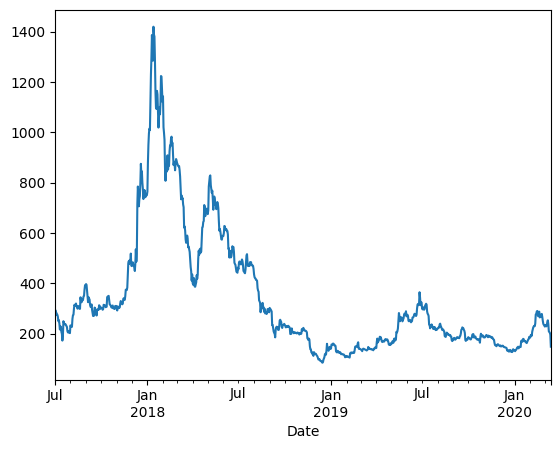

In [ ]:
highs.plot() # Running above cell followed by this cell will o/p a line graph

**One can also resample multiple columns as shown ahead.**

In [ ]:
# NOTE: it's senseless to apply min() to 'High' col in next line; In real life, we need max() of 'High' and min() of 'Low'

df[['High', 'Low']].resample('D').min().head(3)  # Fetching min 'High' & 'Low' vals per day (indicated by 'D')

,High,Low
Date,,
2017-07-01,260.56,253.23
2017-07-02,257.92,255.70
2017-07-03,276.23,273.07


In [ ]:
df.resample('W').min().head(3) # Resampling ENTIRE data frame by week (indicated by 'W')

,ForYear,ForMonth,DayOfWeek,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,,,
2017-07-02,2017,July,Saturday,ETHUSD,256.81,257.92,253.23,256.81,573434.18
2017-07-09,2017,July,Friday,ETHUSD,233.45,234.00,231.25,233.45,138947.87
2017-07-16,2017,July,Friday,ETHUSD,134.32,141.70,130.26,134.32,229799.27


**Resampling enables us to apply multiple aggregation on multiple columns.**

In [ ]:
# Passing col names and aggregation fns on them;
# NOTE: agg. fns. are all in lowercase

df.resample('D').agg({'Close' : 'mean', 'High' : 'max', 'Low' : 'min', 'Volume' : 'sum'}).head(3)

,Close,High,Low,Volume
Date,,,,
2017-07-01,265.284615,279.99,253.23,28584024.81
2017-07-02,269.782500,293.73,255.70,52262287.78
2017-07-03,278.882083,285.00,273.07,35016353.53


### **Calculating the high, low & volume values on same specific day every month (i.e. 2017-07-10, 2017-08-10, 2017-09-10 ... 2020-03-10; the 10th of every month).**

In [126]:
start_date = df.index.min()
# start_date.date  # o/p: <bound method Timestamp.date of Timestamp('2017-07-01 11:00:00')>
start_date = start_date.strftime('%Y-%m-%d')  # o/p: '2017-07-01'

In [127]:
end_date = df.index.max()
end_date = end_date.strftime('%Y-%m-%d')  # o/p: '2020-03-13'

**Using above 2 end points**, start_date **and** end_date, **to create a range of dates:**

In [128]:
# property 'freq' can take a great many values; 'MS' signifies 'month start', & we're offsetting it by 9 days

date_10th = pd.date_range(start = start_date, end = end_date, freq = 'MS') + pd.DateOffset(days = 9)

In [136]:
date_10th[0:5]  # Accessing only first five dates to check

DatetimeIndex(['2017-07-10', '2017-08-10', '2017-09-10', '2017-10-10',
               '2017-11-10'],
              dtype='datetime64[ns]', freq=None)

**Next, resample** df **by days & perform aggregations on required cols. Then, rename the cols for clearer context.**

In [158]:
res = df.resample('D').agg({'High' : 'max', 'Low' : 'min', 'Volume' : 'mean'})
res.rename(columns = {'High' : 'MaxHigh', 'Low' : 'MinLow', 'Volume' : 'AvgVol'}, inplace = True)
res.head(5)

,MaxHigh,MinLow,AvgVol
Date,,,
2017-07-01,279.99,253.23,2.198771e+06
2017-07-02,293.73,255.70,2.177595e+06
2017-07-03,285.00,273.07,1.459015e+06
2017-07-04,282.83,265.00,1.254579e+06
2017-07-05,274.97,252.67,1.797923e+06


**Filtering day 10th of every month:**

In [156]:
res.loc[date_10th].head(5)

,MaxHigh,MinLow,AvgVol
2017-07-10,240.33,185.39,3.483142e+06
2017-08-10,309.80,288.34,1.929642e+06
2017-09-10,306.50,285.13,1.471067e+06
2017-10-10,305.00,295.60,9.941765e+05
2017-11-10,325.12,291.30,1.952232e+06
